#### **Using importlib method to use config.py file in all folders!**

In [4]:
import importlib.util
import os

# Define the path to config.py
config_path = os.path.abspath(os.path.join(os.path.dirname(r'C:\Users\nilay\OneDrive - Cal State Fullerton (1)\Desktop\NILAY-TO-JOB-DATA\SPRING 2024\CPSC 597 Project\Stock-Price-Prediction'), 'Stock-Price-Prediction', 'config.py'))

# Load the module from the specified path
spec = importlib.util.spec_from_file_location("config", config_path)
config = importlib.util.module_from_spec(spec)
spec.loader.exec_module(config)

### **Dataset Loading \ Preprocessing \ Splitting**

#### **Importing Required Libraries**

In [5]:
import pandas as pd     # this is to load the csv data
from matplotlib import pyplot as plt        # used for data visualization
import os       # this is mainly for working with system paths
import numpy as np

#### **Loading the CSV Dataset**

In [6]:
dataset_filepath = os.path.join(config.BASE_DIR, 'dataset', 'INFY.NS.csv')
data_frame = pd.read_csv(dataset_filepath)

In [7]:
# viewing the pandas data_frame
data_frame.sample(5)

,Date,Open,High,Low,Close,Adj Close,Volume
4260,2012-09-14,323.500000,330.587494,323.262512,329.012512,264.868317,10627848.0
3995,2011-08-23,275.156250,287.831238,274.250000,284.618744,226.899094,17143440.0
2208,2004-06-17,80.468750,81.562500,80.187500,81.242966,59.288223,19065792.0
4158,2012-04-23,298.750000,298.750000,288.125000,288.862488,231.555573,18136696.0
5507,2017-10-10,469.975006,469.975006,464.774994,467.725006,419.003052,7143220.0


In [8]:
# taking 3 features for training purpose [close, adj close, volume]

# taking significant features and dropping remaining features
data_frame = data_frame.drop(['Date','Open', 'High', 'Low'], axis=1)
data_frame.sample(5)

,Close,Adj Close,Volume
3631,334.156250,260.301178,3176920.0
4514,376.537506,308.600403,10682440.0
902,24.176952,16.955616,5465600.0
4042,350.262512,280.774506,10779624.0
5939,726.750000,685.851624,7874441.0


In [9]:
# using sklearn MinMaxScaler for scaling values between [0 - 1]
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_frame_scaled = scaler.fit_transform(data_frame.to_numpy())

# scaling Close Price
# scaling Adj. Close Price
# scaling Volume
data_frame_scaled = pd.DataFrame(data_frame_scaled, columns=[
    'Close', 'Adj Close', 'Volume'
])

In [10]:
# viewing scaled data frame
data_frame_scaled.sample(5)

,Close,Adj Close,Volume
1253,0.056778,0.039850,0.241335
2091,0.048350,0.034632,0.088750
5457,0.266150,0.238481,0.045828
5017,0.301384,0.257730,0.055409
2136,0.042345,0.030332,0.182406


In [11]:
# checking for null values and removing it
data_frame_scaled.dropna(inplace=True)

In [12]:
data_frame_scaled.sample(5)

,Close,Adj Close,Volume
3199,0.127965,0.097706,0.046342
1511,0.025068,0.017640,0.152847
4793,0.285994,0.240915,0.018803
4628,0.230010,0.189672,0.147464
1851,0.037391,0.026552,0.117154


In [13]:
# saving the dataframe as csv to check for dataset properly if anything else is needed to clean
df_to_csv_file_path = os.path.join(config.BASE_DIR, 'dataset', 'df_to_csv_final.csv')
data_frame_scaled.to_csv(df_to_csv_file_path)

#### **Plotting the Data Frame Column**

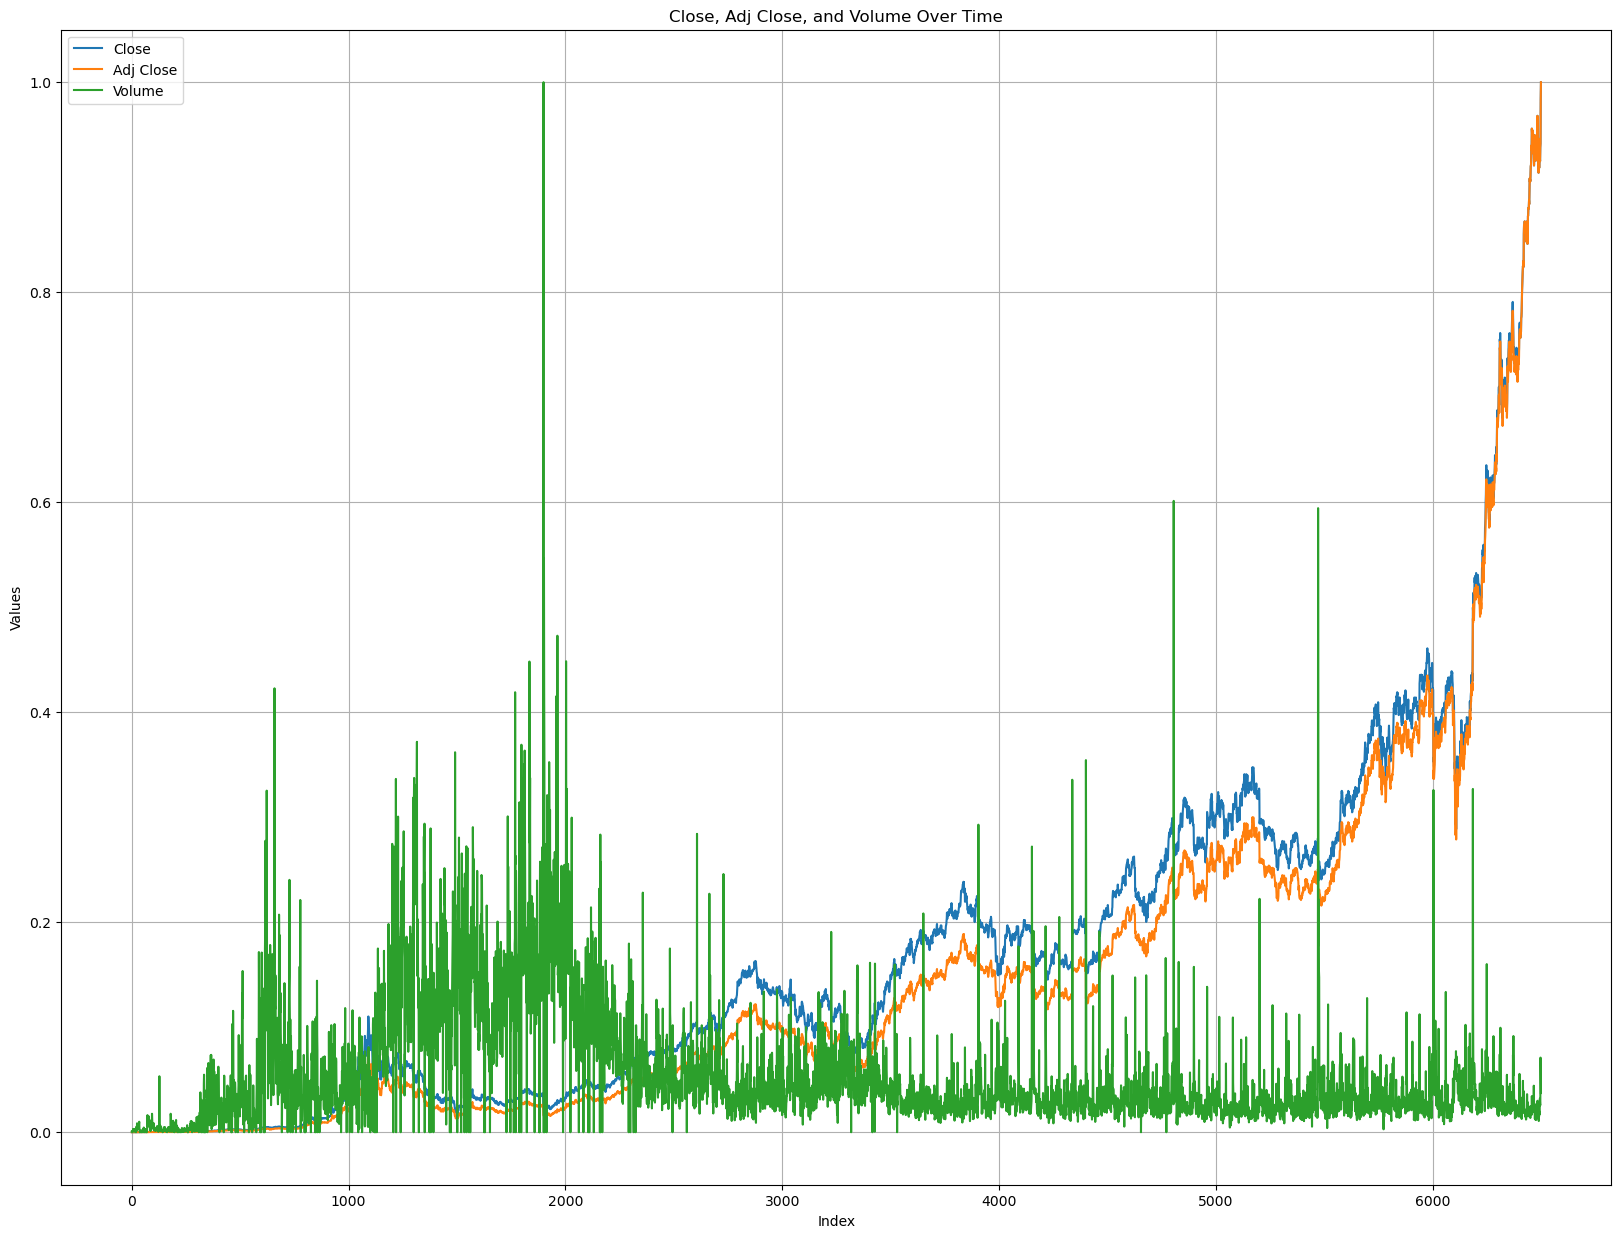

In [14]:
# Plotting the data for visualization
plt.figure(figsize=(20, 15))

plt.plot(data_frame_scaled.index, data_frame_scaled['Close'], label='Close')
plt.plot(data_frame_scaled.index, data_frame_scaled['Adj Close'], label='Adj Close')
plt.plot(data_frame_scaled.index, data_frame_scaled['Volume'], label='Volume')

plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Close, Adj Close, and Volume Over Time')
plt.legend()
plt.grid(True)

plt.show()

In [15]:
data_frame_scaled.shape

(6487, 3)

#### **Converting Pandas Data Frame to Numpy Array**

In [16]:
data_frame_scaled = data_frame_scaled.to_numpy()

In [17]:
# viewing the converted pandas frame to numpy
data_frame_scaled

array([[1.83903821e-05, 1.26826417e-05, 7.40379120e-04],
       [1.66214004e-05, 1.14623018e-05, 7.40379120e-04],
       [1.95702523e-05, 1.34962016e-05, 3.70189560e-04],
       ...,
       [9.41582962e-01, 9.41590556e-01, 7.10582331e-02],
       [9.83529034e-01, 9.83531176e-01, 4.85805436e-02],
       [1.00000000e+00, 1.00000000e+00, 3.73235671e-02]])

In [18]:
# viewing the type of numpy
type(data_frame_scaled)

numpy.ndarray

In [19]:
# viewing the shape
data_frame_scaled.shape

(6487, 3)

#### **Creating Logic to Remember Previous 150 Records for LSTM**

In [20]:
# Create sequences of 100 records
sequence_length = 150
x = []
y = []

for i in range(len(data_frame_scaled) - sequence_length):
    x.append(data_frame_scaled[i:i+sequence_length])
    y.append(data_frame_scaled[i+sequence_length, 0])  # Predicting the "Close" value

x = np.array(x)
y = np.array(y)

#### **Splitting Numpy Array in Train, Test Set**

In [21]:
# Split data into training and testing sets
split = int(len(x) * 0.8)
x_train, x_test = x[:split], x[split:]      # from 0 till split, it goes to train and the rest goes to test
y_train, y_test = y[:split], y[split:]      # from 0 till split, it goes to train and the rest goes to test

In [22]:
# viewing shape of x_train, x_test, y_train, y_test
print("x_train.shape", x_train.shape)
print("x_test.shape", x_test.shape)
print("y_train.shape", y_train.shape)
print("y_test.shape", y_test.shape)

x_train.shape (5069, 150, 3)
x_test.shape (1268, 150, 3)
y_train.shape (5069,)
y_test.shape (1268,)


### **XGBoost Regressor Model (Boosting Algorithm)**

In [119]:
# loading the preprocessed data from "df_to_csv_final.csv"
data_file_path = os.path.join(config.BASE_DIR, 'dataset', 'df_to_csv_final.csv')
dataframe_xgboost = pd.read_csv(data_file_path)
dataframe_xgboost.sample(5)

,Unnamed: 0,Close,Adj Close,Volume
4823,4834,0.290335,0.244571,0.024189
952,952,0.023661,0.016597,0.032265
2328,2328,0.070952,0.051934,0.090949
1523,1523,0.024942,0.017596,0.163672
4461,4471,0.199195,0.163289,0.017625


In [120]:
X_xg = dataframe_xgboost.drop(columns=['Close'])
y_xg = dataframe_xgboost['Close']

In [121]:
# splitting the data frame into train, test
from sklearn.model_selection import train_test_split

X_xg_train, X_xg_test, y_xg_train, y_xg_test = train_test_split(X_xg, y_xg, test_size=0.2, random_state=42)

In [122]:
# Using the XGBoost model
import xgboost as xgb

# Initialize the model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=50, learning_rate=0.05)

# Train the model
xgb_model.fit(X_xg_train, y_xg_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=50, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

#### **Making the Prediction**

In [123]:
# Make predictions
y_xg_pred = xgb_model.predict(X_xg_test)
y_xg_pred

array([0.12440206, 0.26269904, 0.14471088, ..., 0.17949285, 0.07801809,
       0.03550139], dtype=float32)

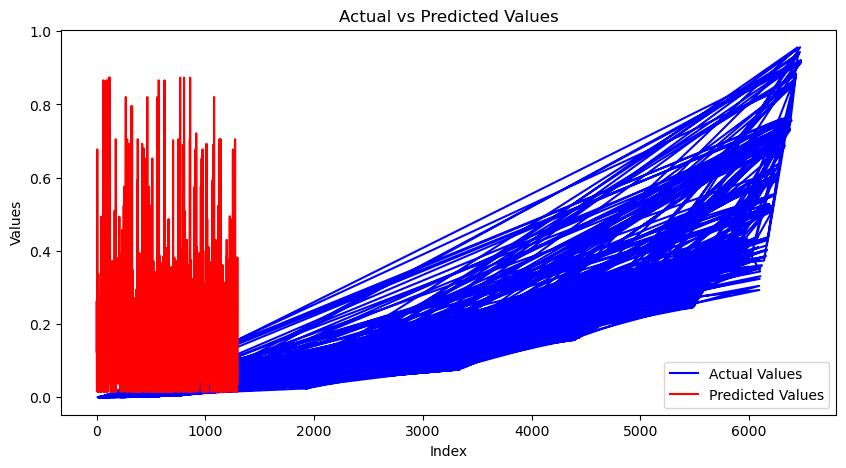

In [124]:
# Create the line chart
plt.figure(figsize=(10, 5))
plt.plot(y_xg_test, color='blue', label='Actual Values')
plt.plot(y_xg_pred, color='red', label='Predicted Values')

# Adding title and labels
plt.title('Actual vs Predicted Values')
plt.xlabel('Index')
plt.ylabel('Values')

# Adding legend
plt.legend()

# Display the chart
plt.show()

### **GRU (Gated Recurrent Unit) MODEL**

#### **Defining GRU Model for Stock Prediction**

In [23]:
# creating GRU model using tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout

model_gru = Sequential()
model_gru.add(GRU(units=50, return_sequences=True, input_shape=(sequence_length, x.shape[2])))
model_gru.add(GRU(units=50, return_sequences=True))
model_gru.add(GRU(units=50, return_sequences=False))
model_gru.add(Dense(units=1))

model_gru.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

c:\Users\nilay\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [24]:
model_gru.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 150, 50)        │         8,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 150, 50)        │        15,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_2 (GRU)                     │ (None, 50)             │        15,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,901 (151.96 KB)

 Trainable params: 38,901 (151.96 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
# fitting the train data into model
history_gru = model_gru.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 60s 304ms/step - loss: 0.0023 - mae: 0.0250 - val_loss: 3.0961e-04 - val_mae: 0.0137
Epoch 2/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 53s 331ms/step - loss: 3.0048e-05 - mae: 0.0039 - val_loss: 2.8466e-04 - val_mae: 0.0124
Epoch 3/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 45s 282ms/step - loss: 2.5426e-05 - mae: 0.0036 - val_loss: 4.3675e-04 - val_mae: 0.0131
Epoch 4/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 84s 296ms/step - loss: 2.1075e-05 - mae: 0.0031 - val_loss: 4.4023e-04 - val_mae: 0.0148
Epoch 5/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 51s 320ms/step - loss: 2.0667e-05 - mae: 0.0032 - val_loss: 6.2484e-04 - val_mae: 0.0146
Epoch 6/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 55s 346ms/step - loss: 1.8970e-05 - mae: 0.0031 - val_loss: 8.1828e-04 - val_mae: 0.0157
Epoch 7/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 50s 316ms/step - loss: 1.6539e-05 - mae: 0.0028 - val_loss: 7.3269e-04 - val_mae: 0.0157
Epoch 8/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 82s 314ms/step - loss: 1.7552e-05 - mae: 0.0029 - val_loss: 7

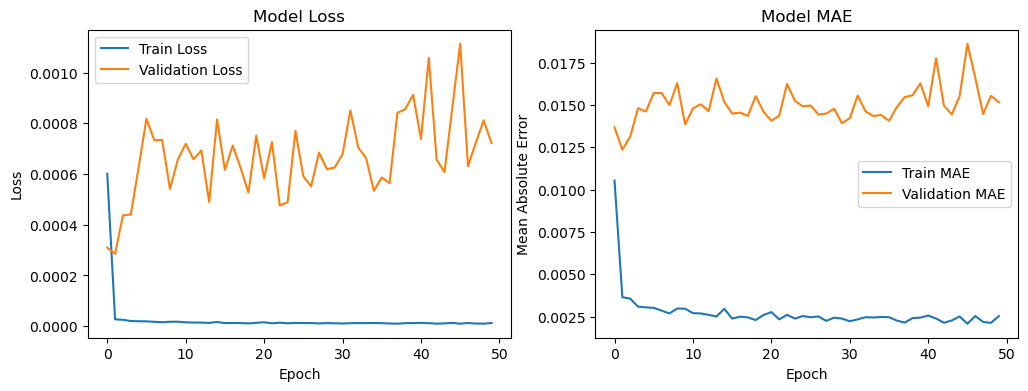

In [30]:
# Plot training & validation loss values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_gru.history['loss'], label='Train Loss')
plt.plot(history_gru.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation MAE values
plt.subplot(1, 2, 2)
plt.plot(history_gru.history['mae'], label='Train MAE')
plt.plot(history_gru.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()

plt.show()

#### **Saving The Model (Both Pickle and H5 File)**

In [26]:
import pickle
import h5py

def save_model(model_gru, pickle_filename, h5_filename):
    # Save as pickle
    with open(pickle_filename, 'wb') as f:
        pickle.dump(model_gru, f)
    
    # Save as HDF5
    model_gru.save(h5_filename)

pickle_file_path_gru = os.path.join(config.BASE_DIR, 'models', 'model_gru.pkl')
h5_file_path_gru = os.path.join(config.BASE_DIR, 'models', 'model_gru.h5')

# Save the model
save_model(model_gru, pickle_file_path_gru, h5_file_path_gru)

#### **Load GRU Pickle Model**

In [27]:
def load_model_from_pickle(pickle_file_path):
    with open(pickle_file_path, 'rb') as f:
        model = pickle.load(f)
    return model

# Load model from pickle file
model_gru_pickle = load_model_from_pickle(pickle_file_path_gru)

#### **Load GRU H5 Model**

In [28]:
def load_model_from_h5(h5_file_path):
    return h5py.File(h5_file_path, 'r')

# Load model from HDF5 file
model_gru_h5 = load_model_from_h5(h5_file_path_gru)

#### **Making Predictions**

In [29]:
# Make predictions
predictions = model_gru_pickle.predict(x_test)
predictions

40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 87ms/step


array([[0.28688315],
       [0.28345388],
       [0.28458357],
       ...,
       [0.8499562 ],
       [0.84821826],
       [0.8900617 ]], dtype=float32)

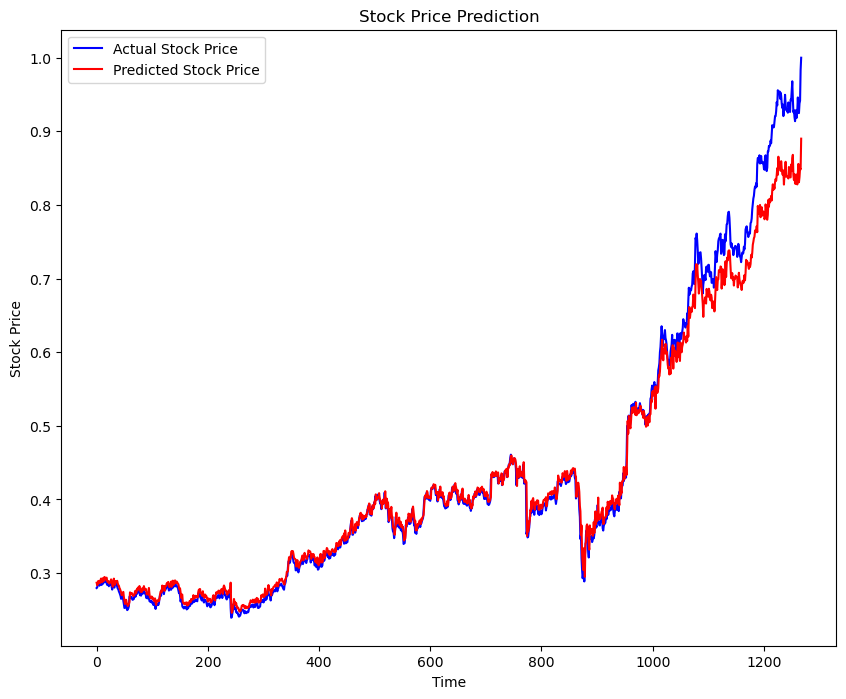

In [42]:
# Inverse the normalization if needed (assuming you have a scaler)
# predictions = scaler.inverse_transform(predictions.reshape(-1, 1))
# y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Evaluate the performance
plt.figure(figsize=(10, 8))
plt.plot(y_test, color='blue', label='Actual Stock Price')
plt.plot(predictions, color='red', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

#### **Predict The Next Week Values**

In [61]:
# viewing all the variables that we need to work with to predict the next value
print(x_test.shape)
print(y_test.shape)
print(predictions.shape)

(1268, 150, 3)
(1268,)
(1268, 1)


In [62]:
# Get the last sequence from the test data
last_sequence_gru = x_test[-1]  # shape (150, 3)

# Create an empty list to store the predicted values
predicted_stock_prices_gru = []

In [63]:
# Predict the stock price for the next 30 days
for _ in range(365):
    # Reshape last_sequence to fit the model input shape (1, sequence_length, num_features)
    last_sequence_reshaped_gru = np.reshape(last_sequence_gru, (1, last_sequence_gru.shape[0], last_sequence_gru.shape[1]))
    
    # Predict the next stock price
    next_price_gru = model_gru.predict(last_sequence_reshaped_gru)
    
    # Append the predicted price to the predicted_stock_prices list
    predicted_stock_prices_gru.append(next_price_gru[0, 0])
    
    # Prepare the next input sequence
    # Remove the first element and add the new predicted price at the end
    new_element_gru = np.array([next_price_gru[0, 0], last_sequence_gru[-1, 1], last_sequence_gru[-1, 2]])  # assuming 3 features
    last_sequence_gru = np.vstack((last_sequence_gru[1:], new_element_gru))

# Convert predicted_stock_prices list to a numpy array
predicted_stock_prices_gru = np.array(predicted_stock_prices_gru)

print(predicted_stock_prices_gru)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/st

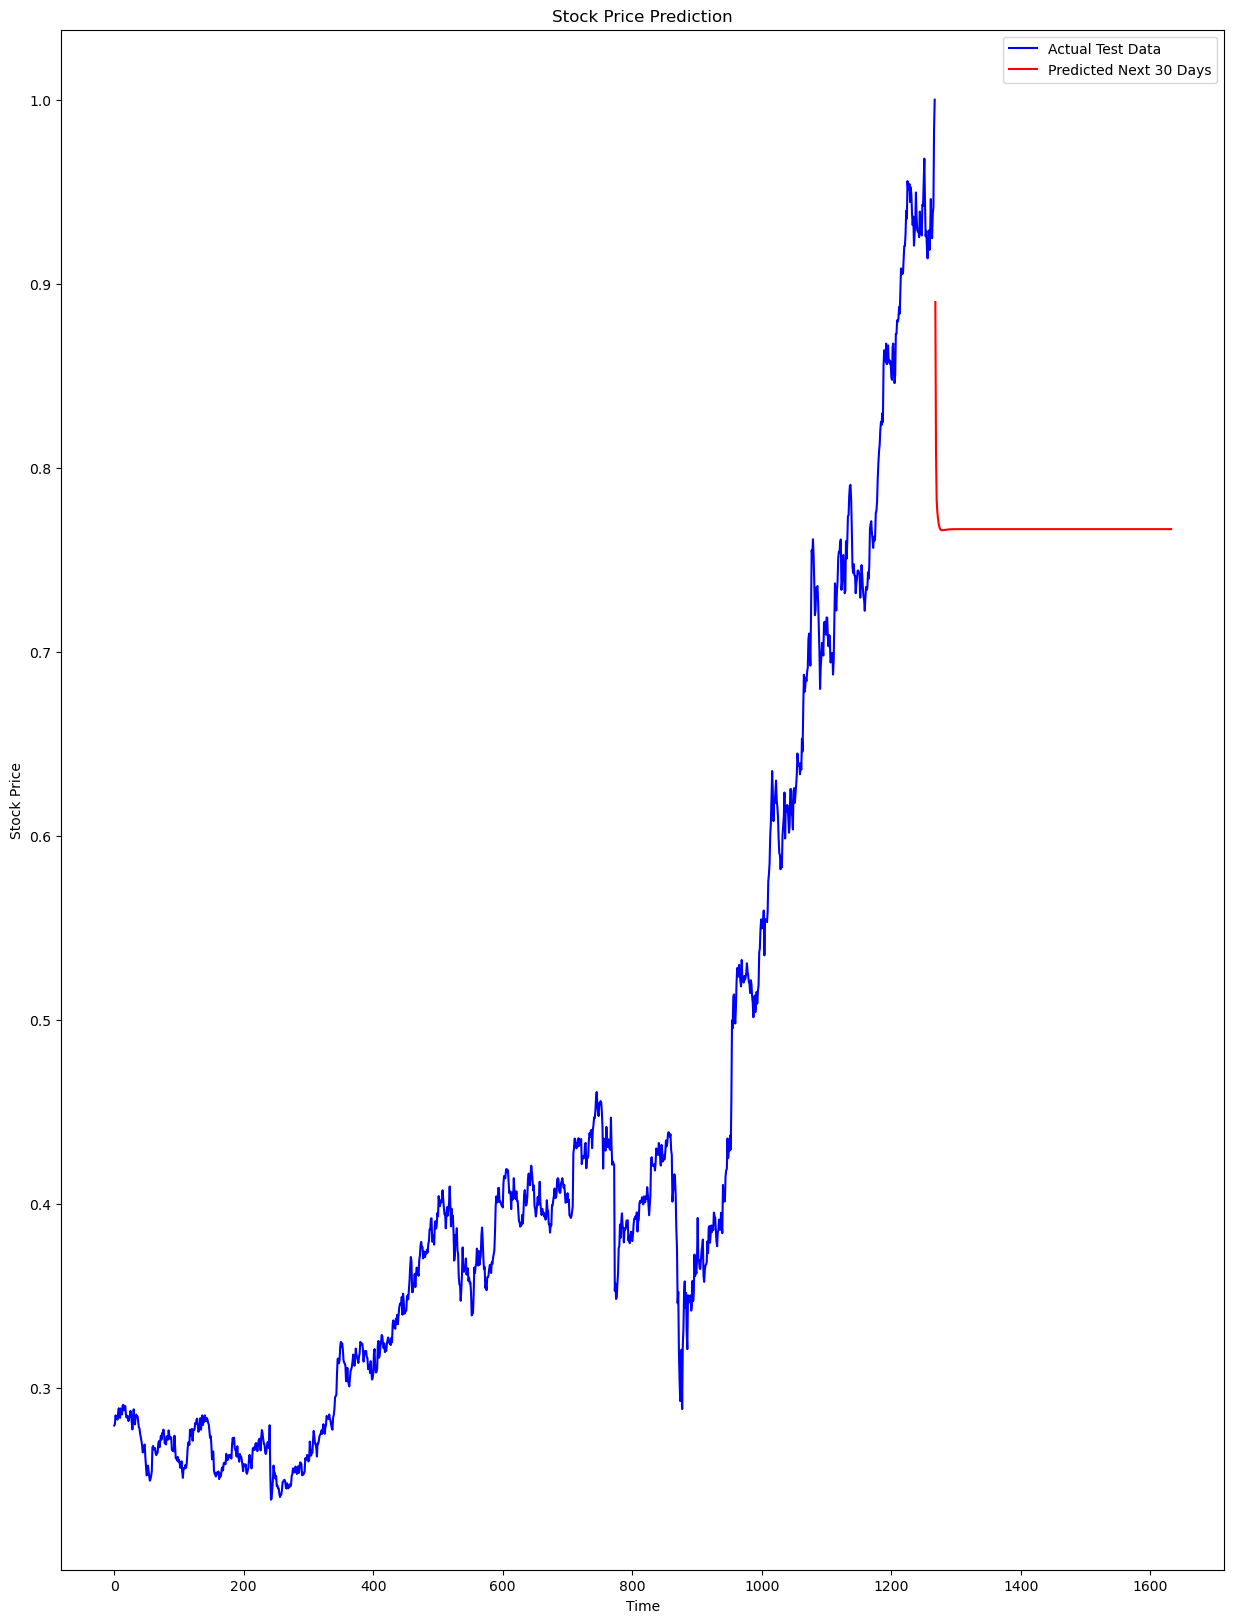

In [64]:
# Plot the actual test predictions and the predicted next 30 days
plt.figure(figsize=(15, 20))
plt.plot(range(len(y_test)), y_test, color='blue', label='Actual Test Data')
plt.plot(range(len(y_test), len(y_test) + len(predicted_stock_prices_gru)), predicted_stock_prices_gru, color='red', label='Predicted Next 30 Days')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction')
plt.legend()
plt.show()

### **LSTM MODEL**

#### **Defining LSTM (Long-Short-Term-Memory) Model for Stock Prediction**

In [32]:
# creating lstm model using tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model_lstm = Sequential()
model_lstm.add(LSTM(units=50, return_sequences=True, input_shape=(sequence_length, x.shape[2])))
model_lstm.add(LSTM(units=50, return_sequences=True))
model_lstm.add(LSTM(units=50, return_sequences=False))
model_lstm.add(Dense(units=1))

model_lstm.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

c:\Users\nilay\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [33]:
# viewing the summary of the model
model_lstm.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 150, 50)        │        10,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 150, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,251 (200.20 KB)

 Trainable params: 51,251 (200.20 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
# fitting the train data into model
history_lstm = model_lstm.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 52s 273ms/step - loss: 0.0014 - mae: 0.0214 - val_loss: 0.0037 - val_mae: 0.0347
Epoch 2/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 69s 187ms/step - loss: 5.6877e-05 - mae: 0.0052 - val_loss: 0.0035 - val_mae: 0.0333
Epoch 3/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 40s 252ms/step - loss: 5.4109e-05 - mae: 0.0050 - val_loss: 0.0029 - val_mae: 0.0300
Epoch 4/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 43s 262ms/step - loss: 5.1821e-05 - mae: 0.0050 - val_loss: 0.0016 - val_mae: 0.0265
Epoch 5/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 41s 258ms/step - loss: 5.3122e-05 - mae: 0.0050 - val_loss: 0.0028 - val_mae: 0.0307
Epoch 6/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 43s 268ms/step - loss: 4.2372e-05 - mae: 0.0046 - val_loss: 0.0023 - val_mae: 0.0274
Epoch 7/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 70s 192ms/step - loss: 4.6446e-05 - mae: 0.0047 - val_loss: 0.0021 - val_mae: 0.0259
Epoch 8/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 48s 238ms/step - loss: 3.8737e-05 - mae: 0.0043 - val_loss: 0.0013 - val_mae: 0.0212
Epoc

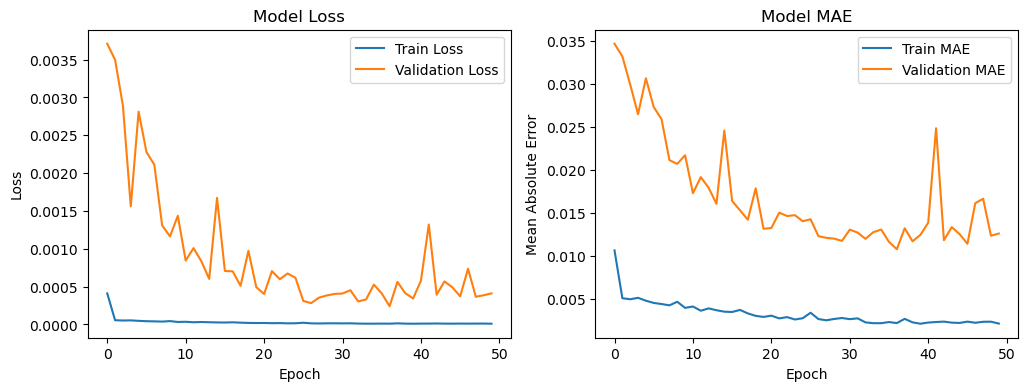

In [36]:
# Plot training & validation loss values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_lstm.history['loss'], label='Train Loss')
plt.plot(history_lstm.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation MAE values
plt.subplot(1, 2, 2)
plt.plot(history_lstm.history['mae'], label='Train MAE')
plt.plot(history_lstm.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()

plt.show()

#### **Saving The Model (Both Pickle and H5 File)**

In [37]:
import pickle
import h5py

def save_model(model, pickle_filename, h5_filename):
    # Save as pickle
    with open(pickle_filename, 'wb') as f:
        pickle.dump(model, f)
    
    # Save as HDF5
    model.save(h5_filename)

pickle_file_path_lstm = os.path.join(config.BASE_DIR, 'models', 'model_lstm.pkl')
h5_file_path_lstm = os.path.join(config.BASE_DIR, 'models', 'model_lstm.h5')

# Save the model
save_model(model_lstm, pickle_file_path_lstm, h5_file_path_lstm)

#### **Load LSTM Pickle Model**

In [38]:
def load_model_from_pickle(pickle_file_path):
    with open(pickle_file_path, 'rb') as f:
        model = pickle.load(f)
    return model

# Load model from pickle file
model_lstm_pickle = load_model_from_pickle(pickle_file_path_lstm)


#### **Load LSTM H5 Model**

In [39]:
def load_model_from_h5(h5_file_path):
    return h5py.File(h5_file_path, 'r')

# Load model from HDF5 file
model_lstm_h5 = load_model_from_h5(h5_file_path_lstm)

#### **Making Predictions**

In [40]:
# Make predictions
predictions_lstm = model_lstm_pickle.predict(x_test)
predictions_lstm

40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step


array([[0.28662008],
       [0.28313088],
       [0.2841209 ],
       ...,
       [0.8774603 ],
       [0.8754646 ],
       [0.9346068 ]], dtype=float32)

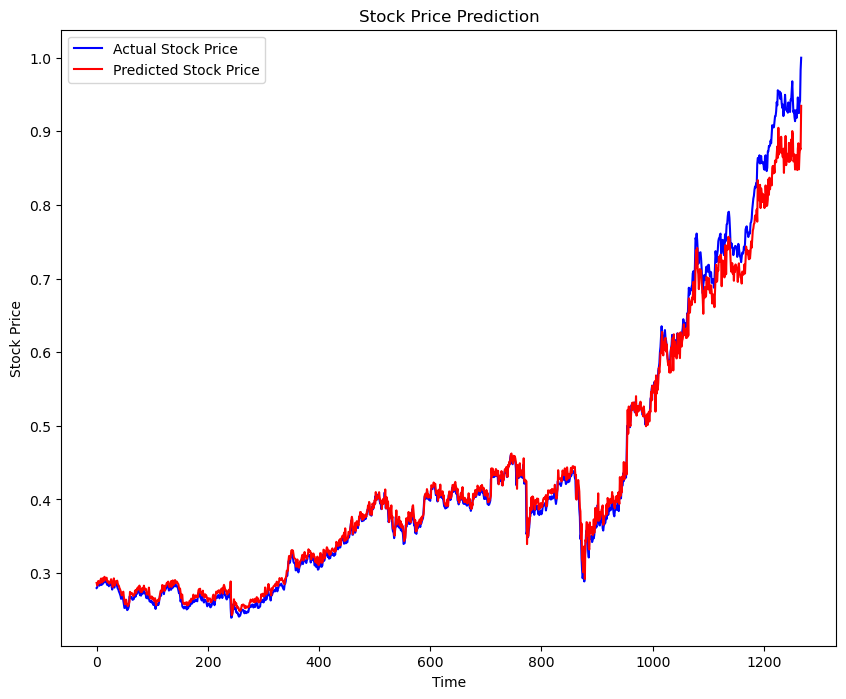

In [43]:
# Inverse the normalization if needed (assuming you have a scaler)
# predictions = scaler.inverse_transform(predictions.reshape(-1, 1))
# y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Evaluate the performance
plt.figure(figsize=(10, 8))
plt.plot(y_test, color='blue', label='Actual Stock Price')
plt.plot(predictions_lstm, color='red', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

#### **Predict The Next Week Values**

In [65]:
# viewing all the variables that we need to work with to predict the next value
print(x_test.shape)
print(y_test.shape)
print(predictions_lstm.shape)

(1268, 150, 3)
(1268,)
(1268, 1)


In [66]:
# Get the last sequence from the test data
last_sequence_lstm = x_test[-1]  # shape (150, 3)

# Create an empty list to store the predicted values
predicted_stock_prices_lstm = []

In [67]:
# Predict the stock price for the next 30 days
for _ in range(365):
    # Reshape last_sequence to fit the model input shape (1, sequence_length, num_features)
    last_sequence_reshaped_lstm = np.reshape(last_sequence_lstm, (1, last_sequence_lstm.shape[0], last_sequence_lstm.shape[1]))
    
    # Predict the next stock price
    next_price_lstm = model_lstm.predict(last_sequence_reshaped_lstm)
    
    # Append the predicted price to the predicted_stock_prices list
    predicted_stock_prices_lstm.append(next_price_lstm[0, 0])
    
    # Prepare the next input sequence
    # Remove the first element and add the new predicted price at the end
    new_element_lstm = np.array([next_price_lstm[0, 0], last_sequence_lstm[-1, 1], last_sequence_lstm[-1, 2]])  # assuming 3 features
    last_sequence_lstm = np.vstack((last_sequence_lstm[1:], new_element_lstm))

# Convert predicted_stock_prices list to a numpy array
predicted_stock_prices_lstm = np.array(predicted_stock_prices_lstm)

print(predicted_stock_prices_lstm)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━

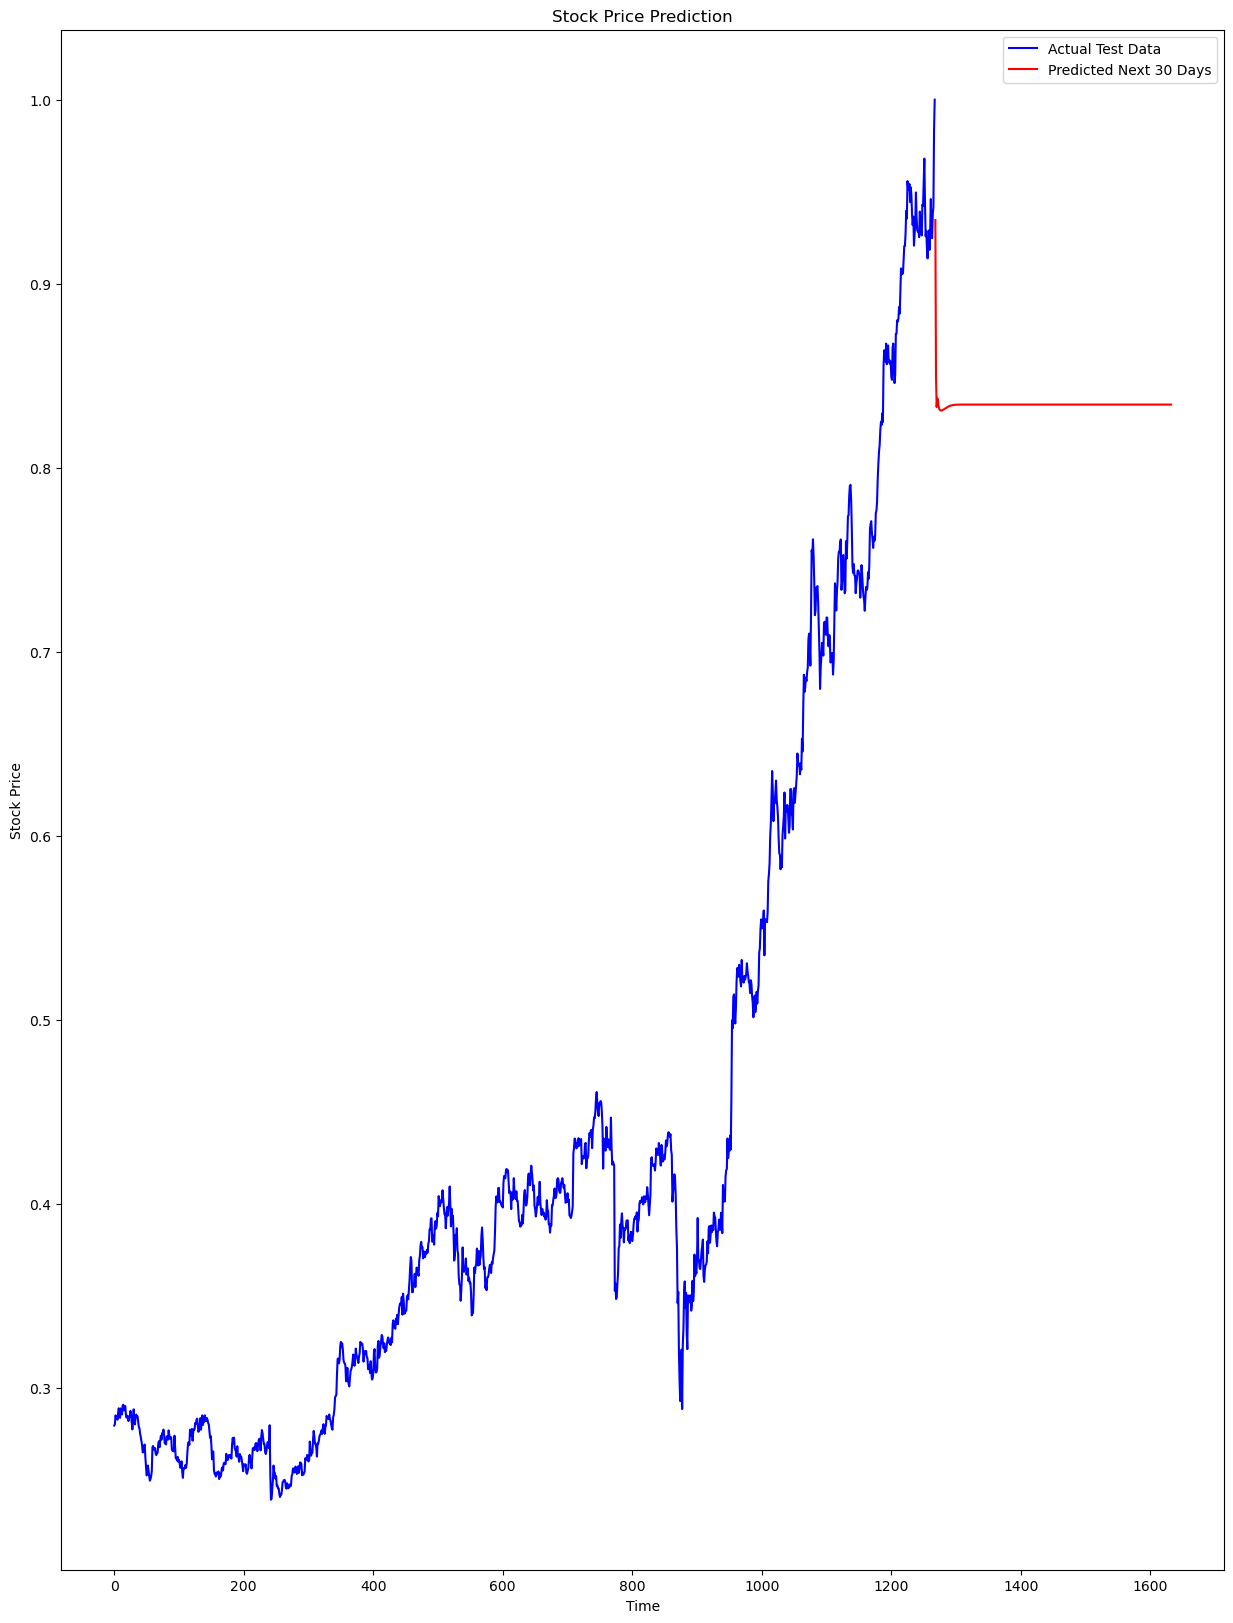

In [68]:
# Plot the actual test predictions and the predicted next 30 days
plt.figure(figsize=(15, 20))
plt.plot(range(len(y_test)), y_test, color='blue', label='Actual Test Data')
plt.plot(range(len(y_test), len(y_test) + len(predicted_stock_prices_lstm)), predicted_stock_prices_lstm, color='red', label='Predicted Next 30 Days')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction')
plt.legend()
plt.show()